Trend Observation

1st: It's easy to see that in the first scatter plot, the trend of tmax temperatures tend to be around the latitude of 20. Due to the angle of the earth to the sun, we know the the earth is not angled in such a perfect way that the latitude of 0 if exactly facing the sun. We can then assume since the earth i tilted approximately 23.5 relative to our orital plane. We can see it safe to assume, it's actually hotter along the latitude of 20 and not of 0 (the equator's line)
2nd: Many countries tend to have around 50% humidity no matter the lattitude, so we can assume that its possible latitude does not have large impact on humidity
3rd: There tends to be no trend or relavent insight from the scatter plots of latitude against cloudiness and wind-speed.

In [1]:
# Dependencies 
import pandas as pd  # Used to create DataFrames 
import matplotlib.pyplot as plt # Used to produce a scatterplot
import requests  # Used to retrieve information from an API 
import json # Used to read the API retrievals well
from citipy import citipy # Used to generate some random cities 
from api_config import api_key # For the API key needed to retrieve information 
import random # To use a random number generator 
import csv #To write/import a Pandas Dataframe onto a CSV

In [2]:
# Setting up the url of the API for GET requests 
url = "http://api.openweathermap.org/data/2.5/weather?units=metric"

In [3]:
cities_N_A = []
cities = []
city_info = []
x=0
# Collecting the a sample of city names from Citipy with a while loop
while len(city_info)!=500:
    # using citipy to generate a city using random latitude/longitude coordinates
    city = citipy.nearest_city(round(random.uniform(-90,90),2),round(random.uniform(-180,180),2))
    # extracting the city name string from "city"
    city_name = city.city_name
    # We collect the cities here, and if a city is not in our list than we put it into our list, "cities"
    if city_name not in cities:
        # If the city isn't in our list, we append it to our list to store it for later reference when using the Google maps API
        cities.append(city.city_name)
        # Here is the request to get information from an API, Google Maps API
        city_data = requests.get(url+"&appid="+api_key+"&q="+str(city_name)).json()    
        # Here is a try/except statement, the goal here is to try to see if the city from citipy is recognizable by Google Maps API
        try: # Try to retrieve a city's information stored in cities, if so append that city to our city_info list.
            if city_name not in city_info:
                city_info.append([city_data["name"], city_data["main"]["temp"],
                                  city_data["main"]["humidity"], city_data["clouds"]["all"],
                                  city_data["wind"]["speed"], city_data["coord"]["lat"],
                                  city_data["coord"]["lon"], city_data["sys"]["country"]])
                city_ID = city_data["sys"]["id"]
                x=x+1
                print('''
                        City: {0}
                        City Number: {1}
                        ------------'''.format(city_name,x))
        except: # Except, if the city is unrecognizable to the google maps API, then just append this city to the cities_N_A list. 
            cities_N_A.append(city) # for some cities the API does not recognize, so then i've created a list to store these unique cities


                        City: busselton
                        City Number: 1
                        ------------

                        City: albany
                        City Number: 2
                        ------------

                        City: mataura
                        City Number: 3
                        ------------

                        City: moshkovo
                        City Number: 4
                        ------------

                        City: cabo san lucas
                        City Number: 5
                        ------------

                        City: saint-philippe
                        City Number: 6
                        ------------

                        City: clyde river
                        City Number: 7
                        ------------

                        City: esperance
                        City Number: 8
                        ------------

                        City: bambous virieux
           


                        City: san francisco
                        City Number: 72
                        ------------

                        City: alta floresta
                        City Number: 73
                        ------------

                        City: hasaki
                        City Number: 74
                        ------------

                        City: arraial do cabo
                        City Number: 75
                        ------------

                        City: vila do maio
                        City Number: 76
                        ------------

                        City: bagn
                        City Number: 77
                        ------------

                        City: longyearbyen
                        City Number: 78
                        ------------

                        City: kapaa
                        City Number: 79
                        ------------

                        City: tasiilaq
        


                        City: stillwater
                        City Number: 142
                        ------------

                        City: sterling
                        City Number: 143
                        ------------

                        City: naze
                        City Number: 144
                        ------------

                        City: alice springs
                        City Number: 145
                        ------------

                        City: turayf
                        City Number: 146
                        ------------

                        City: port augusta
                        City Number: 147
                        ------------

                        City: dunedin
                        City Number: 148
                        ------------

                        City: yatou
                        City Number: 149
                        ------------

                        City: poquoson
               


                        City: slave lake
                        City Number: 212
                        ------------

                        City: beisfjord
                        City Number: 213
                        ------------

                        City: kaeo
                        City Number: 214
                        ------------

                        City: elko
                        City Number: 215
                        ------------

                        City: qostanay
                        City Number: 216
                        ------------

                        City: benjamin constant
                        City Number: 217
                        ------------

                        City: acapulco
                        City Number: 218
                        ------------

                        City: peniche
                        City Number: 219
                        ------------

                        City: havelock
             

In [4]:
# Renaming the columns of the city_info DataFrame to their appropriate references
city_info_df = pd.DataFrame(city_info).rename(columns={0: "City",1: "Temperature (Celcius)",2:"Humidity (%)",
                                        3:"Cloudiness (%)", 4:"Wind Speed (mph)", 5:"Latitude Coord.",
                                        6:"Longitude Coord.",7:"Country"})

In [5]:
# Displaying the columns of the dataframe 
city_info_df.head(1)

,City,Temperature (Celcius),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude Coord.,Longitude Coord.,Country
0,Tolaga Bay,4.88,93,21,1.31,-38.37,178.3,NZ


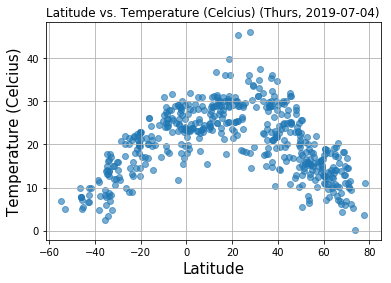

In [6]:
# Creating the scatter plot for Temp&Lat

scat1 = plt.scatter(x = city_info_df["Latitude Coord."],
                    y = city_info_df["Temperature (Celcius)"],
                    alpha = .6)

plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Temperature (Celcius)', fontsize = 15)
plt.title('Latitude vs. Temperature (Celcius) (Thurs, 2019-07-04)')
plt.grid()
plt.show()

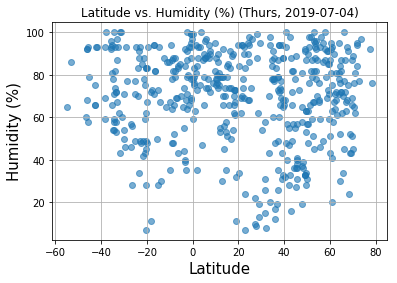

In [7]:
# Creating the scatter plot for Humid.&Lat

scat2 = plt.scatter(x = city_info_df["Latitude Coord."],
                    y = city_info_df["Humidity (%)"],
                    alpha = .6)

plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Humidity (%)', fontsize = 15)
plt.title('Latitude vs. Humidity (%) (Thurs, 2019-07-04)')
plt.grid()
plt.show()

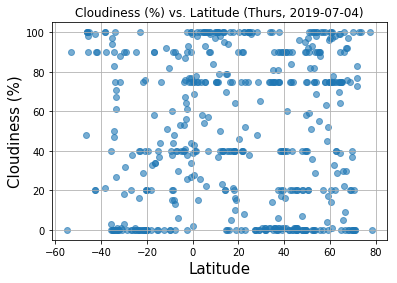

In [8]:
# Creating the scatter plot for Cloudiness&Lat

scat3 = plt.scatter(x = city_info_df["Latitude Coord."],
                    y = city_info_df["Cloudiness (%)"],
                    alpha = .6)

plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Cloudiness (%)', fontsize = 15)
plt.title('Cloudiness (%) vs. Latitude (Thurs, 2019-07-04)')
plt.grid()
plt.show()

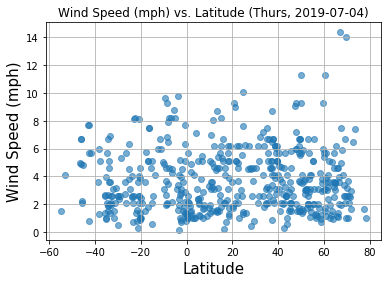

In [9]:
# Creating the scatter plot for Wind-Speed&Lat

scat1 = plt.scatter(x = city_info_df["Latitude Coord."],
                    y = city_info_df["Wind Speed (mph)"],
                    alpha = .6)

plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Wind Speed (mph)', fontsize = 15)
plt.title('Wind Speed (mph) vs. Latitude (Thurs, 2019-07-04)')
plt.grid()
plt.show()

In [13]:
city_info_df.to_csv(r'C:\Users\carlo\Desktop\API_Homework_6_.csv', index = None, header = True )